# Title

# Table of contents

[1. Business Understanding](#1.-Business-Understanding) </br>
[1.1 Business Description](#1.1-Business-Description) </br>
[1.2 Problem Statement](#1.2-Problem-Statement) </br>
[1.3 Main Objective](#1.3-Main-Objective) </br>
[1.4 Specific Objectives](#1.4-Specific-Objectives) </br>
[2. Importing Libraries And Warnings](#2.-Importing-Libraries-And-Warnings) </br>
[3. Data Understanding](#3.-Data-Understanding) </br>
[4. Data Preparation](#4.-Data-Preparation) </br>
[5. EDA](#5.-EDA) </br>
[6. Data Preprocessing](#6.-Data-Preprocessing) </br>
[7. Data Modelling](#7.-Data-Modelling) </br>
[8. Evaluation](#8.-Evaluation) </br>
[9. Recommendations](#9.-Recommendations) </br>
[10. Conclusions](#10.-Conclusions) </br>
[11. Challenges](#11.-Challenges)

# 1. Business Understanding

## 1.1 Business Description

## 1.2 Problem Statement

## 1.3 Main Objective

## 1.4 Specific Objectives

# 2. Importing Libraries And Warnings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage

# 3. Data Understanding

In [2]:
df = pd.read_csv("Data/Customer Segmentation.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.shape

(200, 5)

# 4. Data Preparation

## 4.1 Missing Values

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 4.2 Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

## 4.3 Renaming Columns

In [9]:
# Renaming Columns
df.rename(columns = {"Spending Score (1-100)": "Spending Score", "Annual Income (k$)": "Annual Income", "CustomerID": "Customer ID"}, inplace = True)
df

,Customer ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 4.4 Dropping Unwanted Columns

In [10]:
df.drop(columns = "Customer ID", inplace = True)
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# 5. EDA

## 5.1 Univariate analysis

Gender
Female    112
Male       88
Name: count, dtype: int64


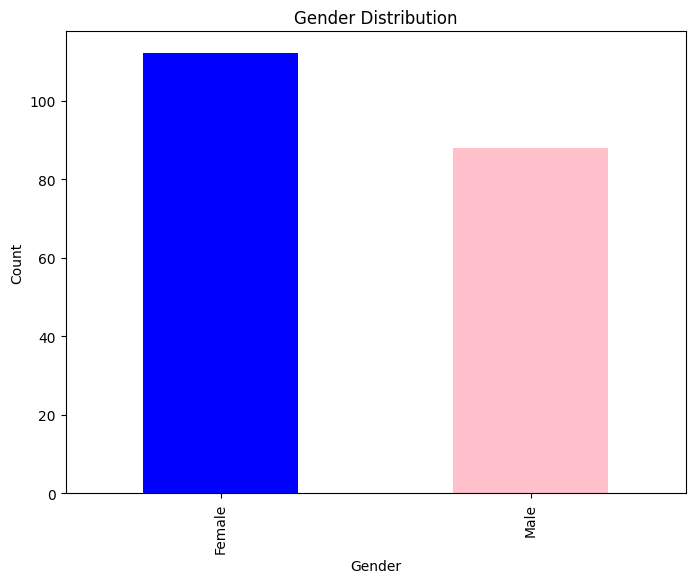

In [11]:
# Count the occurrences of each gender
gender_counts = df["Gender"].value_counts()

# Display the counts
print(gender_counts)

# Plot a bar chart
gender_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 6))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

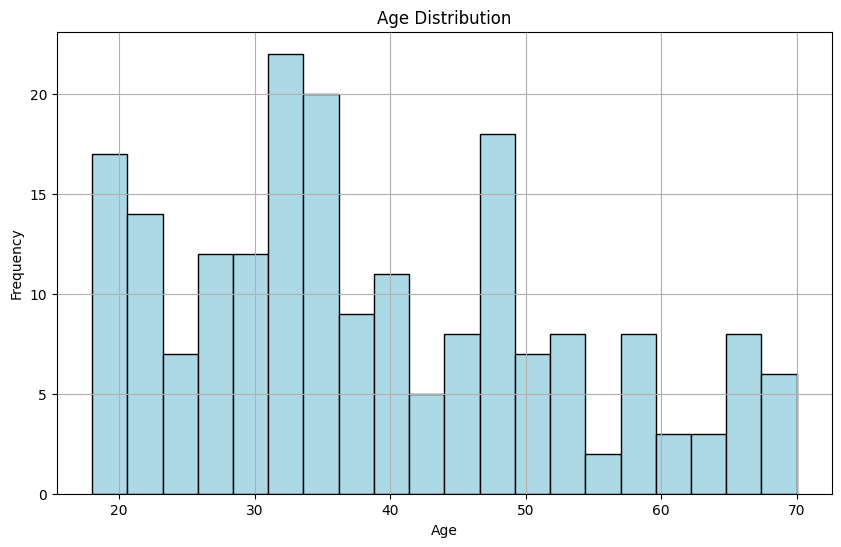

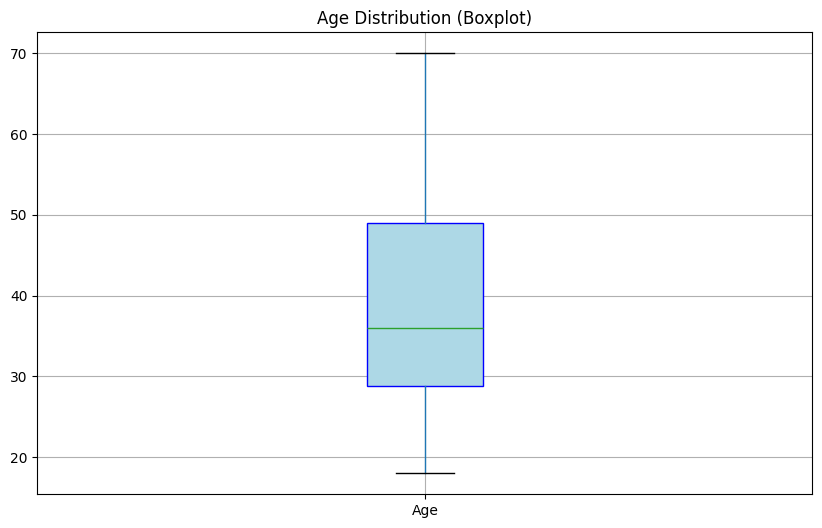

In [12]:
# Plotting a histogram for Age
plt.figure(figsize=(10, 6))
df["Age"].hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Alternatively, a boxplot for Age
plt.figure(figsize=(10, 6))
df.boxplot(column="Age", patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Age Distribution (Boxplot)')
plt.show()

In [13]:
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


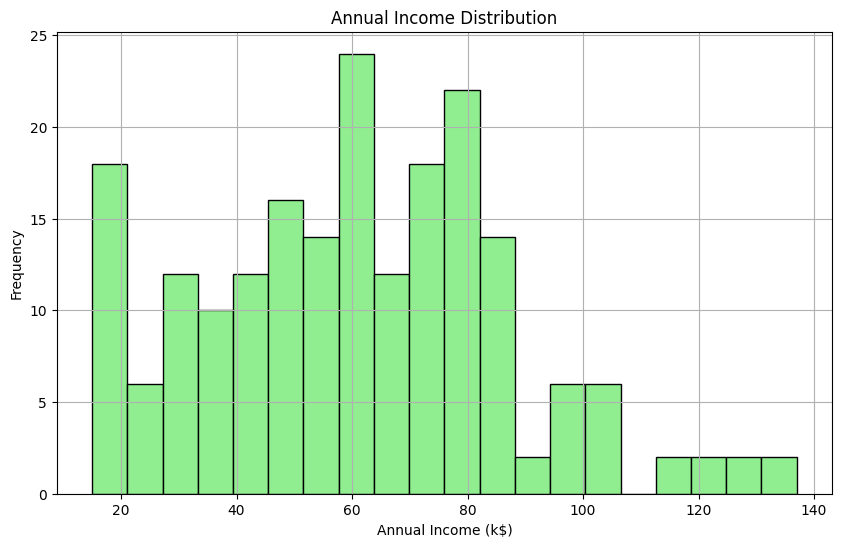

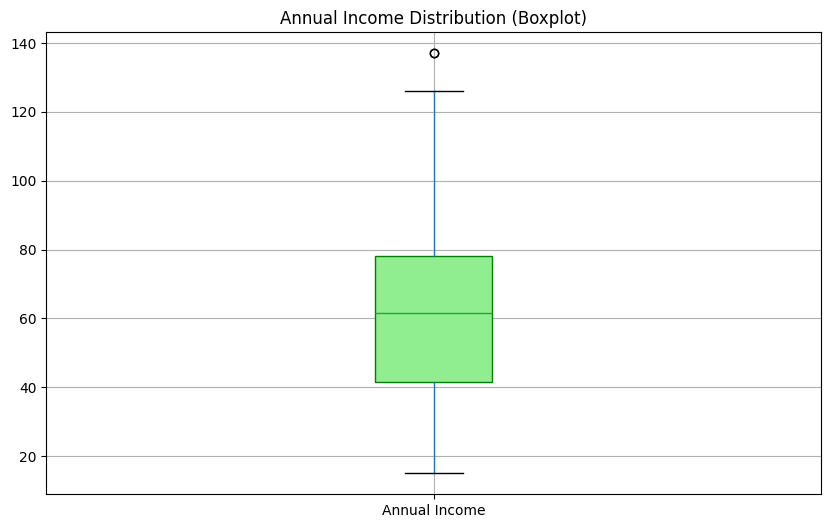

In [14]:
# Plotting a histogram for Annual Income
plt.figure(figsize=(10, 6))
df["Annual Income"].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Annual Income
plt.figure(figsize=(10, 6))
df.boxplot(column="Annual Income", patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
plt.title('Annual Income Distribution (Boxplot)')
plt.show()

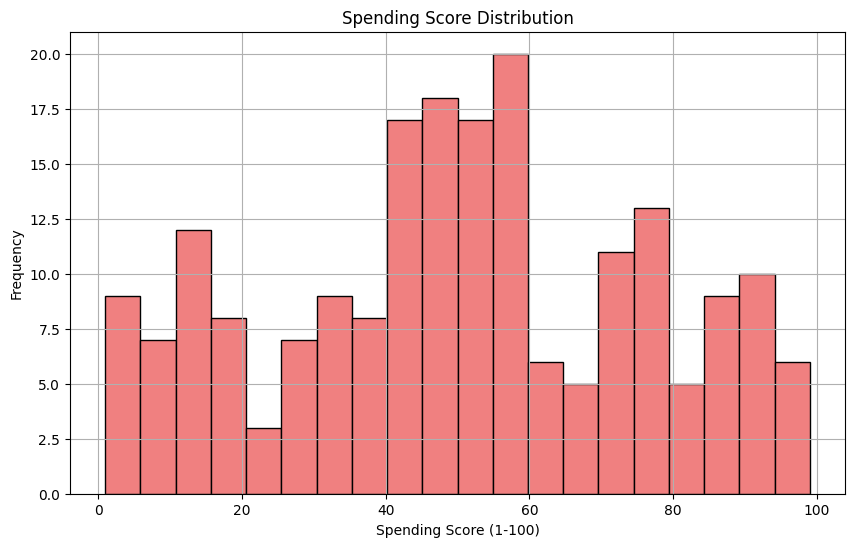

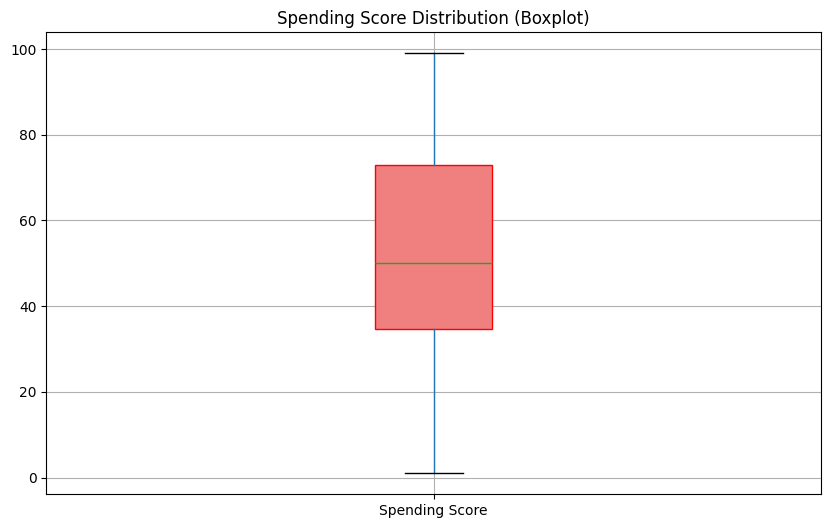

In [15]:
# Plotting a histogram for Spending Score
plt.figure(figsize=(10, 6))
df["Spending Score"].hist(bins=20, color='lightcoral', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Spending Score
plt.figure(figsize=(10, 6))
df.boxplot(column="Spending Score", patch_artist=True, boxprops=dict(facecolor='lightcoral', color='red'))
plt.title('Spending Score Distribution (Boxplot)')
plt.show()

## 5.2 Bivariate analysis

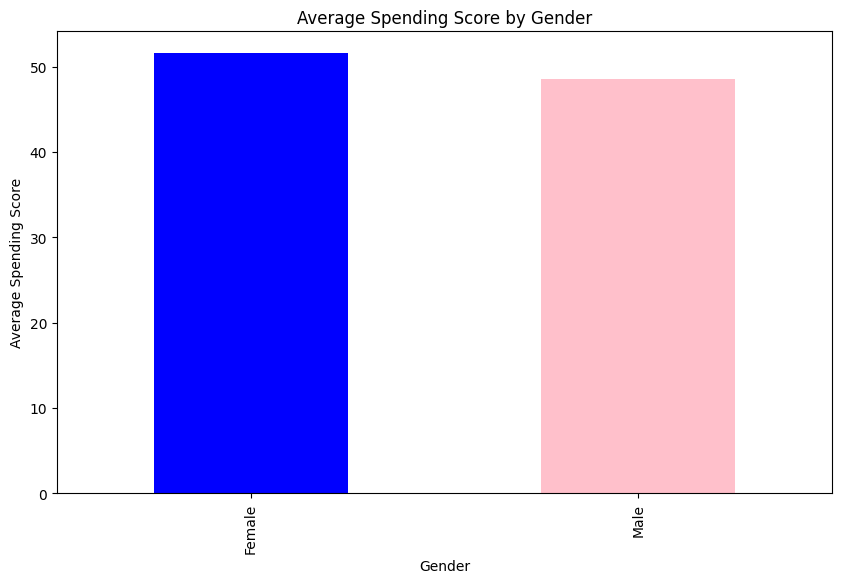

In [16]:
# Group by gender and calculate the mean of the Spending Score
gender_avg_spending = df.groupby("Gender")["Spending Score"].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
gender_avg_spending.plot(kind='bar', color=['blue', 'pink'])

plt.title("Average Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")

plt.show()

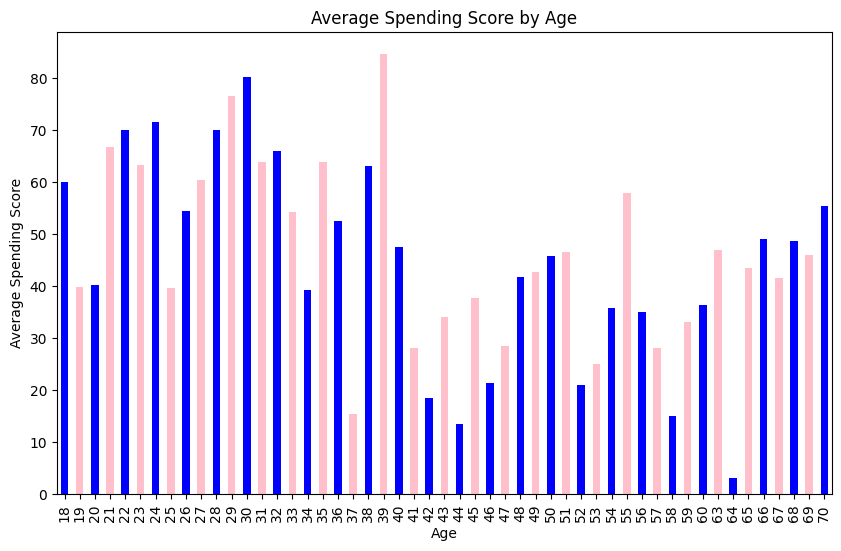

In [17]:
# Group by gender and calculate the mean of the Spending Score
gender_avg_spending = df.groupby("Age")["Spending Score"].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
gender_avg_spending.plot(kind='bar', color=['blue', 'pink'])

plt.title("Average Spending Score by Age")
plt.xlabel("Age")
plt.ylabel("Average Spending Score")

plt.show()

In [18]:
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


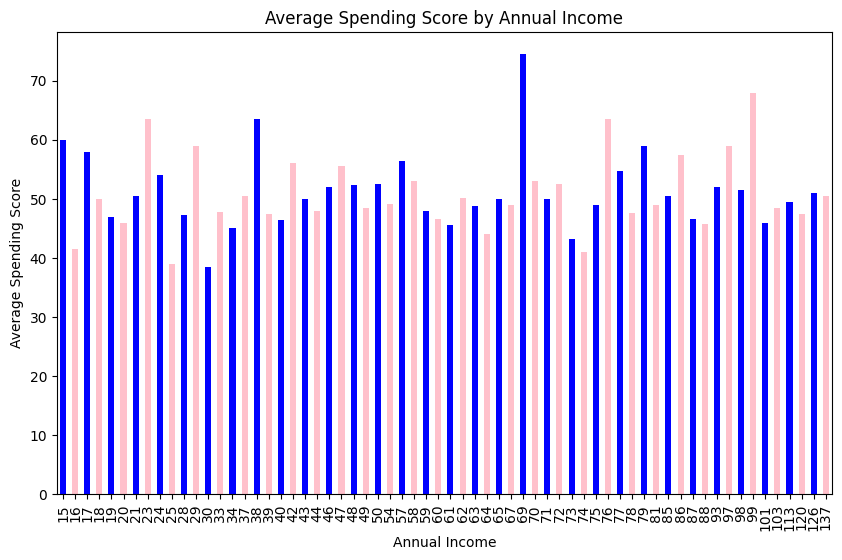

In [19]:
# Group by gender and calculate the mean of the Spending Score
gender_avg_spending = df.groupby("Annual Income")["Spending Score"].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
gender_avg_spending.plot(kind='bar', color=['blue', 'pink'])

plt.title("Average Spending Score by Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Average Spending Score")

plt.show()

## 5.3 Multivariate analysis

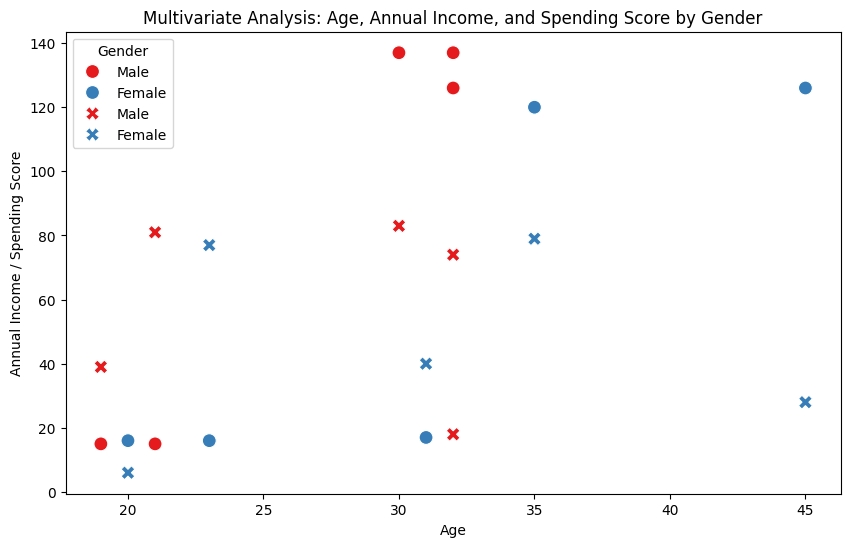

In [20]:
# Sample DataFrame
data = {
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male'],
    'Age': [19, 21, 20, 23, 31, 35, 45, 32, 32, 30],
    'Annual Income': [15, 15, 16, 16, 17, 120, 126, 126, 137, 137],
    'Spending Score': [39, 81, 6, 77, 40, 79, 28, 74, 18, 83]
}

# Convert data into DataFrame
df = pd.DataFrame(data)

# Set plot size
plt.figure(figsize=(10, 6))

# Create scatter plot with gender-based color
sns.scatterplot(x='Age', y='Annual Income', hue='Gender', data=df, s=100, palette='Set1')

# Create second scatter plot for Spending Score vs Age
sns.scatterplot(x='Age', y='Spending Score', hue='Gender', data=df, s=100, palette='Set1', marker='X')

# Add titles and labels
plt.title('Multivariate Analysis: Age, Annual Income, and Spending Score by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income / Spending Score')

# Show legend
plt.legend(title='Gender')

# Display the plot
plt.show()

# 6. Data Preprocessing

## 6.1 Label Encoding

In [21]:
# Replacing male with 1 and female with 2
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 2})
df

/tmp/ipykernel_44980/2329829142.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 2})


,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
5,2,35,120,79
6,2,45,126,28
7,1,32,126,74
8,1,32,137,18
9,1,30,137,83


## 6.2 Train Test Split

In [22]:
X = df.drop(columns = ["Spending Score"])
y = df["Spending Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

# 7. Data Modelling

## 7.1 KNN

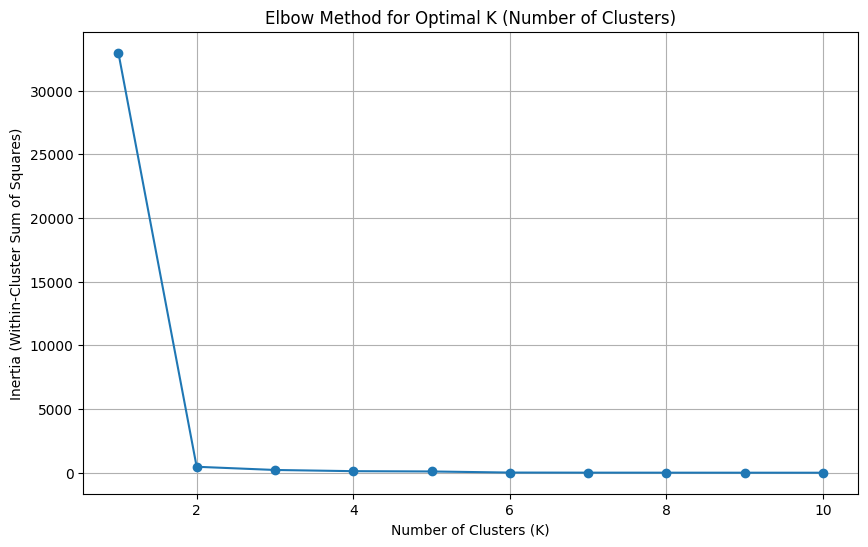

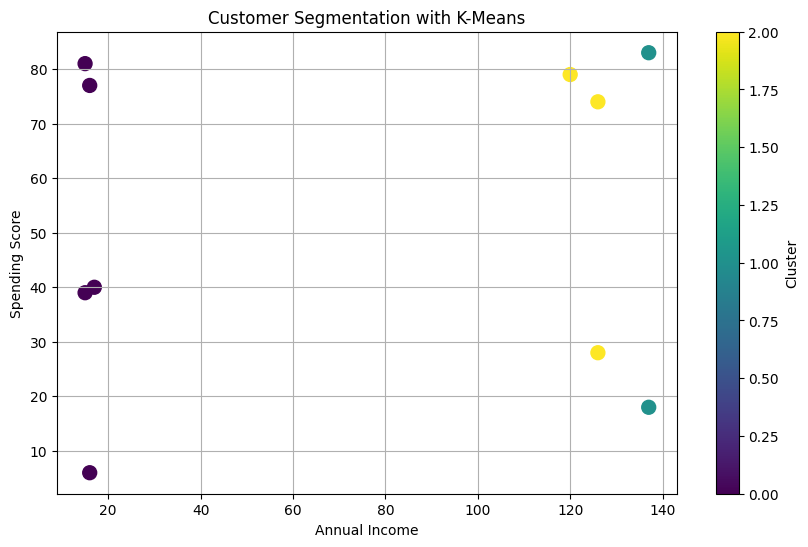

In [23]:
# Data Preparation
X = df.drop(columns=["Spending Score"])

# Determine Optimal Number of Clusters Using Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K (Number of Clusters)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

# Apply K-Means with Optimal Number of Clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Annual Income"], df["Spending Score"], c=df["Cluster"], cmap='viridis', s=100)
plt.title("Customer Segmentation with K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

## 7.2 GMM

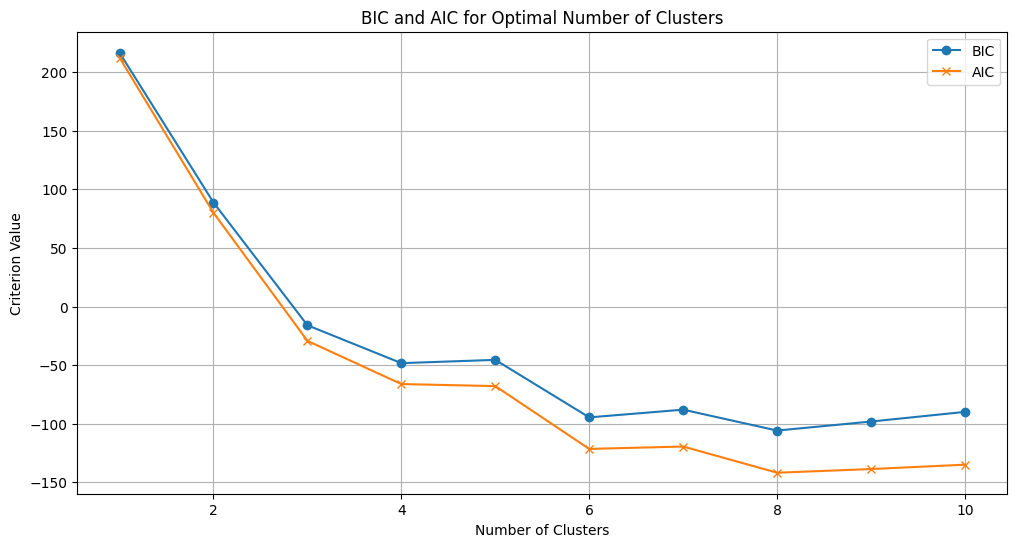

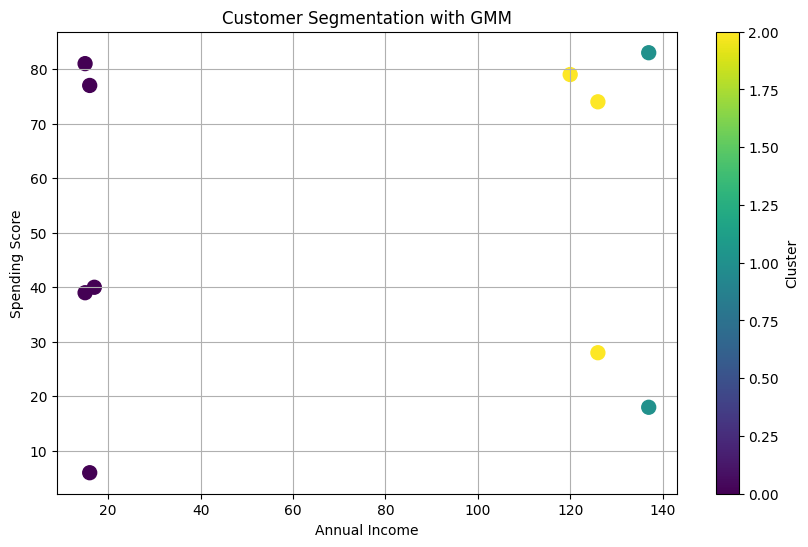

In [24]:
# Data Preparation
X = df.drop(columns=["Spending Score"])

# Step 1: Determine Optimal Number of Clusters
bic = []
aic = []
cluster_range = range(1, 11)

for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    bic.append(gmm.bic(X))  # Bayesian Information Criterion
    aic.append(gmm.aic(X))  # Akaike Information Criterion

# Plot BIC and AIC to find optimal clusters
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, bic, label="BIC", marker='o')
plt.plot(cluster_range, aic, label="AIC", marker='x')
plt.title("BIC and AIC for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Criterion Value")
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Fit GMM with Optimal Number of Clusters (e.g., k=3)
optimal_k = 3
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df["Cluster"] = gmm.fit_predict(X)

# Step 3: Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Annual Income"], df["Spending Score"], c=df["Cluster"], cmap="viridis", s=100)
plt.title("Customer Segmentation with GMM")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

## 7.3 DBSCAN

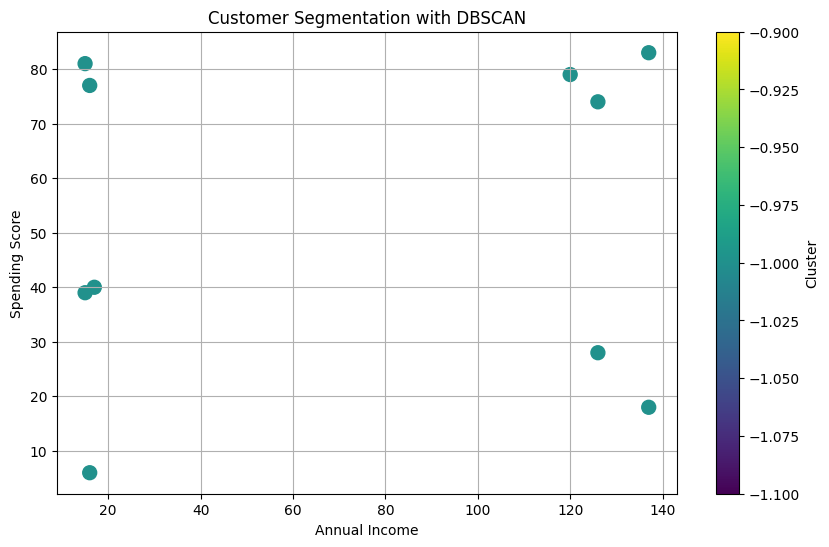

Cluster
-1    10
Name: count, dtype: int64


In [25]:
# Step 1: Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize data for better clustering performance

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps is the radius of neighborhood; min_samples is the min number of points in a neighborhood
clusters = dbscan.fit_predict(X_scaled)

# Step 3: Add Cluster Labels to DataFrame
df["Cluster"] = clusters

# Step 4: Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Annual Income"], df["Spending Score"], c=df["Cluster"], cmap="viridis", s=100)
plt.title("Customer Segmentation with DBSCAN")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# Step 5: Inspect Cluster Assignments
print(df["Cluster"].value_counts())

## 7.4 Hierarchical Clustering

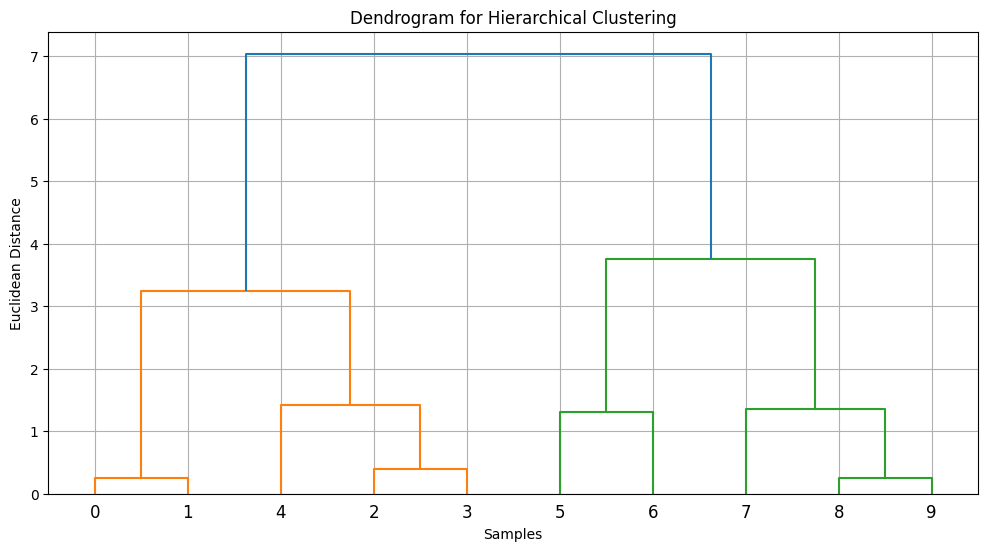

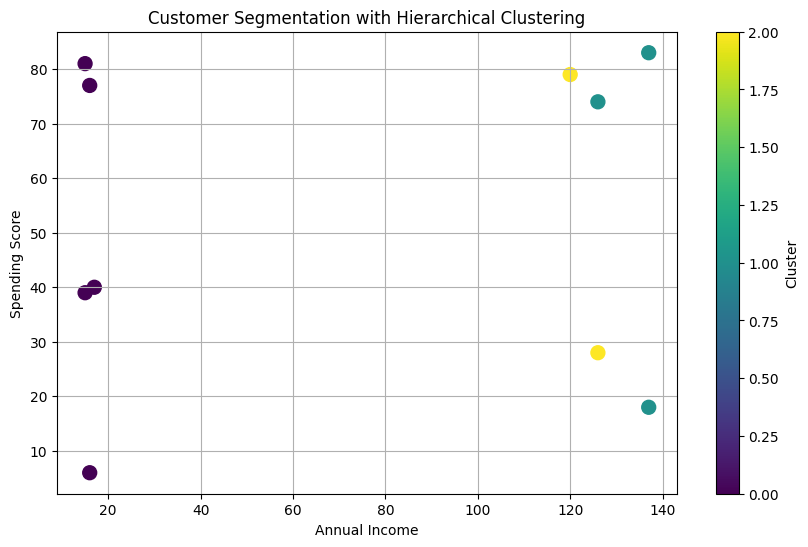

Cluster
0    5
1    3
2    2
Name: count, dtype: int64


In [26]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Dendrogram
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(X_scaled, method="ward")  # 'ward' minimizes variance within clusters
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

# Step 3: Apply Agglomerative Clustering
n_clusters = 3  # Based on dendrogram analysis
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="ward")
df["Cluster"] = hierarchical_clustering.fit_predict(X_scaled)

# Step 4: Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Annual Income"], df["Spending Score"], c=df["Cluster"], cmap="viridis", s=100)
plt.title("Customer Segmentation with Hierarchical Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# Step 5: Inspect Cluster Assignments
print(df["Cluster"].value_counts())

## 7.5 Mean Shift Clustering

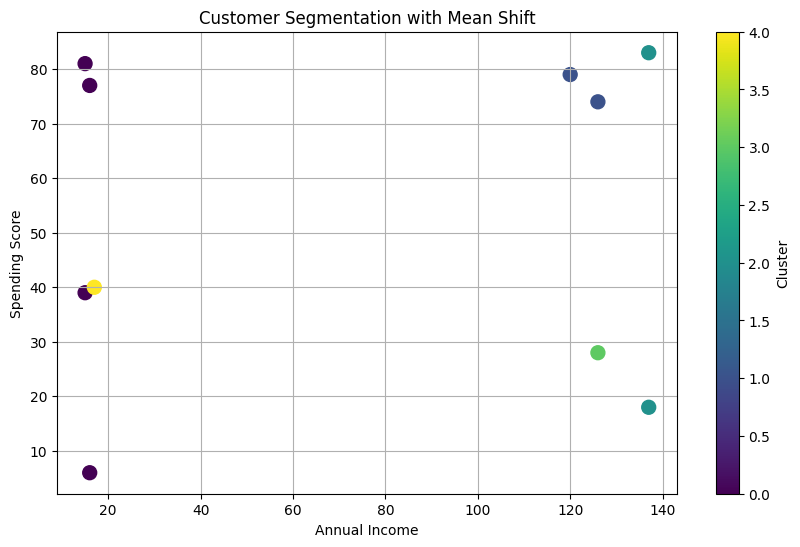

In [27]:
# Step 1: Apply Mean Shift clustering
mean_shift = MeanShift()
df["Cluster"] = mean_shift.fit_predict(X)

# Step 2: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Annual Income"], df["Spending Score"], c=df["Cluster"], cmap="viridis", s=100)
plt.title("Customer Segmentation with Mean Shift")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

## 7.6 SOM

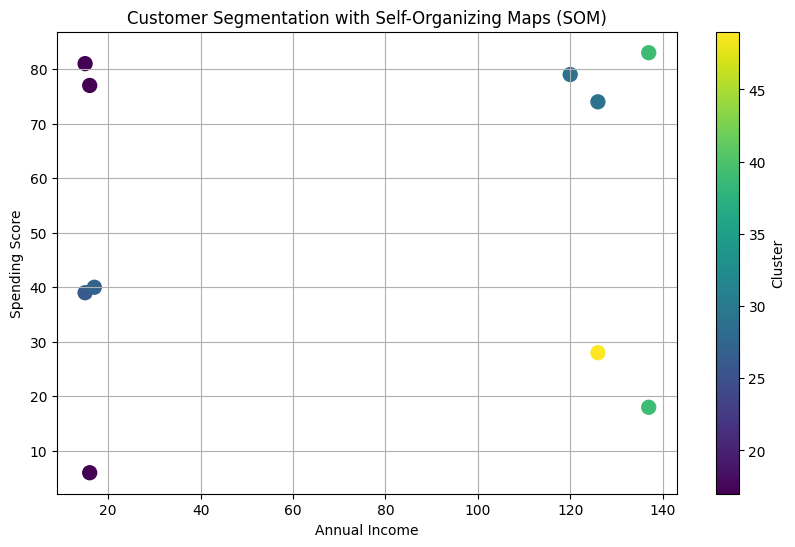

In [28]:
# Step 1: Normalize the data
X_normalized = np.array(X)  # Ensure that X is in numpy format

# Step 2: Create and train SOM
som = MiniSom(x=10, y=10, input_len=X_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X_normalized, 100)  # 100 iterations

# Step 3: Assign clusters based on the SOM output
# Use the winner coordinates as cluster labels
cluster_labels = np.array([som.winner(x) for x in X_normalized])

# Step 4: Visualize the clusters
# Flatten the cluster_labels to use for color mapping
cluster_labels_flat = [label[0] * 10 + label[1] for label in cluster_labels]  # Flatten (x, y) coordinates

plt.figure(figsize=(10, 6))
plt.scatter(df["Annual Income"], df["Spending Score"], c=cluster_labels_flat, cmap="viridis", s=100)
plt.title("Customer Segmentation with Self-Organizing Maps (SOM)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# 8. Evaluation

# 9. Recommendations

# 10. Conclusions

# 11. Challenges